# Create CIGALE data file for EMU sources

Saves a file in the format required for CIGALE.
DES (mag_auto), VIKING (mag_petro), CATWISE (mag_psf)

# Import Libraries

In [2]:
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
import missingno

# Define the directory

In [8]:
observatory = '/home/mfonseca/fastdisk'
my_computer = '/home/polaris/Lab_Astro/data/'

directory = my_computer

In [9]:
matched_no_mags_path = directory + 'cross_match/EMU_0102-32_DESY6GOLD_VIKING_CATWISE_noMags/EMU_0102-32_DESY6GOLD_VIKINGDR5_CATWISE_noMag_petro_2.fits'
matched_no_mags = Table.read(matched_no_mags_path).filled()
matched_no_mags = matched_no_mags.to_pandas()

match_mask = (matched_no_mags['match_flag'] == 1) & (matched_no_mags['p_i'] >= 0.1) & (matched_no_mags['p_any'] >=0.83)
catalog_matches_noMags = matched_no_mags[match_mask]
print(f'Number of objects in the catalog {len(catalog_matches_noMags)}')

# Here we select objects that have matches in all three surveys
full_match_mask = (catalog_matches_noMags['DESY6_coadd_object_id'] != -99) & (catalog_matches_noMags['VKG_sourceID'] != -99) & (catalog_matches_noMags['CAT_source_id'] != b'-99')
catalog_matches_noMags_full = catalog_matches_noMags[full_match_mask]

# Ignore the warning
catalog_matches_noMags_full['EMU_island_name'] = catalog_matches_noMags_full['EMU_island_name'].str.decode('utf-8').str.strip(' ')

print(f'Number of objects in the catalog that have matches in all three surveys {len(catalog_matches_noMags_full)}')

catalog_matches_noMags_full.drop(columns=['DESY6_mag_auto_y_extcorr', 'DESY6_z_y_extcorr','VKG_magerr_petro_z', 'VKG_mag_petro_z_ab_extcorr'], inplace=True)
catalog_matches_noMags_full.dropna(inplace=True)

print(f'Number of objects in the catalog that have matches in all three surveys and have full photometry {len(catalog_matches_noMags_full)}')

Number of objects in the catalog 11695
Number of objects in the catalog that have matches in all three surveys 3855
Number of objects in the catalog that have matches in all three surveys and have full photometry 3530


/tmp/ipykernel_14680/2944410317.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_matches_noMags_full['EMU_island_name'] = catalog_matches_noMags_full['EMU_island_name'].str.decode('utf-8').str.strip(' ')
/tmp/ipykernel_14680/2944410317.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catalog_matches_noMags_full.drop(columns=['DESY6_mag_auto_y_extcorr', 'DESY6_z_y_extcorr','VKG_magerr_petro_z', 'VKG_mag_petro_z_ab_extcorr'], inplace=True)
/tmp/ipykernel_14680/2944410317.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [4]:
nonemu_path = '/home/polaris/Lab_Astro/data/cigale/nonemu_data/nonemu_data_sample3.data'
nonemu_data = pd.read_csv(nonemu_path)

## Histogram of Redshifts

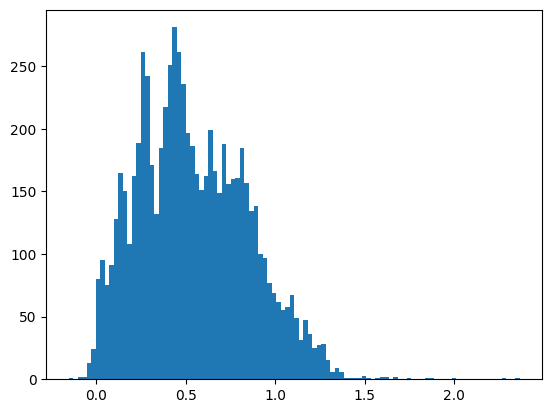

In [5]:
plt.hist(nonemu_data['DESY6_dnf_z'], bins = 100)
plt.show()

# Define column names

In [6]:
id = ['VKG_sourceID']

redshift = ['DESY6_dnf_z']

des_filters_cigale = ['ctio_decam.g', 'ctio_decam.r', 'ctio_decam.i', 'ctio_decam.z', 'ctio_decam.Y']
des_errors_cigale = ['ctio_decam.g_err', 'ctio_decam.r_err', 'ctio_decam.i_err', 'ctio_decam.z_err', 'ctio_decam.Y_err']

viking_filters_cigale = ['paranal.vircam.Z', 'paranal.vircam.Y', 'paranal.vircam.J', 'paranal.vircam.H', 'paranal.vircam.Ks']
viking_errors_cigale = ['paranal.vircam.Z_err', 'paranal.vircam.Y_err', 'paranal.vircam.J_err', 'paranal.vircam.H_err', 'paranal.vircam.Ks_err']

catwise_filters_cigale = ['wise.W1', 'wise.W2']
catwise_errors_cigale = ['wise.W1_err', 'wise.W2_err']


In [7]:
extra_cols_dict = {
    'VKG_sourceID' : 'id',
    'DESY6_dnf_z' : 'redshift',
}

des_cols_dict = {
    'DESY6_mag_auto_g_extcorr_flux': 'ctio.decam.g',
    'DESY6_mag_auto_r_extcorr_flux': 'ctio.decam.r',
    'DESY6_mag_auto_i_extcorr_flux': 'ctio.decam.i',
    'DESY6_mag_auto_z_extcorr_flux': 'ctio.decam.z',
    'DESY6_magerr_auto_g_fluxerr' : 'ctio.decam.g_err',
    'DESY6_magerr_auto_r_fluxerr' : 'ctio.decam.r_err',
    'DESY6_magerr_auto_i_fluxerr' : 'ctio.decam.i_err',
    'DESY6_magerr_auto_z_fluxerr' : 'ctio.decam.z_err',
}

viking_cols_dict = {
    'VKG_mag_petro_y_ab_extcorr_flux': 'paranal.vircam.Y',
    'VKG_mag_petro_j_ab_extcorr_flux': 'paranal.vircam.J',
    'VKG_mag_petro_h_ab_extcorr_flux': 'paranal.vircam.H',
    'VKG_mag_petro_ks_ab_extcorr_flux': 'paranal.vircam.Ks',
    'VKG_magerr_petro_y_fluxerr': 'paranal.vircam.Y_err',
    'VKG_magerr_petro_j_fluxerr': 'paranal.vircam.J_err',
    'VKG_magerr_petro_h_fluxerr': 'paranal.vircam.H_err',
    'VKG_magerr_petro_ks_fluxerr': 'paranal.vircam.Ks_err',

}

catwise_cols_dict = {
    'CAT_w1mpro_ab_flux': 'wise.W1',
    'CAT_w2mpro_ab_flux': 'wise.W2',
    'CAT_w1sigmpro_fluxerr': 'wise.W1_err',
    'CAT_w2sigmpro_fluxerr': 'wise.W2_err',
}

all_dicts = [extra_cols_dict, des_cols_dict, viking_cols_dict, catwise_cols_dict]
mag_cols = [
    'DESY6_mag_auto_g_extcorr',
    'DESY6_mag_auto_r_extcorr',
    'DESY6_mag_auto_i_extcorr',
    'DESY6_mag_auto_z_extcorr',
    'VKG_mag_petro_y_ab_extcorr',
    'VKG_mag_petro_j_ab_extcorr',
    'VKG_mag_petro_h_ab_extcorr',
    'VKG_mag_petro_ks_ab_extcorr',
    'CAT_w1mpro_ab',
    'CAT_w2mpro_ab'
]

mag_err_cols = [
    'DESY6_magerr_auto_g',
    'DESY6_magerr_auto_r',
    'DESY6_magerr_auto_i',
    'DESY6_magerr_auto_z',
    'VKG_magerr_petro_y',
    'VKG_magerr_petro_j',
    'VKG_magerr_petro_h',
    'VKG_magerr_petro_ks',
    'CAT_w1sigmpro',
    'CAT_w2sigmpro'
]

In [8]:
catalog_matches_noMags_full['DESY6_magerr_auto_g'].describe()

NameError: name 'catalog_matches_noMags_full' is not defined

# Convert magnitudes to fluxes

In [9]:
def mag_to_flux_mJy(mag):
    '''
    Convert magnitude to flux using the formula:

    Args:
        mag (float or array-like): Magnitude value(s) to convert.

    Returns:
        float or array-like: Corresponding flux value(s) in mJy.

    '''
    return 10 ** (6.56-0.4 * mag)

def magerr_to_fluxerr_mJy(mag, magerr):
    '''

    Args:
        mag (float or array-like): Magnitude value(s) to convert.
        magerr (float or array-like): Magnitude error value(s) to convert.

    Returns:
        float or array-like: Corresponding flux error value(s) in mJy.
    
    '''

    return np.maximum(np.log(10) * 0.4 * 10 ** (6.56-0.4 * mag) * magerr, 10 ** (6.56-0.4 * mag)*0.1 )

In [10]:
def add_flux_to_df(df, mag_cols, mag_err_cols):
    '''
    Add flux and flux error columns to the DataFrame.
    If the flux error is smaller than 0.1, use 

    Args:
        df (DataFrame): Input DataFrame.
        mag_cols (list): List of magnitude column names.
        mag_err_cols (list): List of magnitude error column names.

    Returns:
        DataFrame: Updated DataFrame with flux and flux error columns added.
    
    '''

    df = df.copy()

    for mag_col, mag_err_col in zip(mag_cols, mag_err_cols):
        # Create new column names for flux and flux error
        flux_col = f"{mag_col}_flux"
        flux_err_col = f"{mag_err_col}_fluxerr"

        # Convert magnitudes to fluxes
        df[flux_col] = mag_to_flux_mJy(df[mag_col])

        # Convert magnitude errors to flux errors
        df[flux_err_col] = magerr_to_fluxerr_mJy(df[mag_col], df[mag_err_col])

    return df

# Create a catalog for CIGALE

Creates an ASCII file for cigale 

In [11]:
def generate_ascii_with_flux(catalog_df, mag_columns, mag_error_columns, dict_all_cols, n_rows ,output_path):
    """
    Converts magnitude columns and magnitude error columns to flux and flux error in mJy.

    Args:
        df (pd.DataFrame): DataFrame with magnitude columns and their corresponding error columns.
        mag_columns (list): List of magnitude column names to convert.
        mag_error_columns (list): List of magnitude error column names to convert.
        dict_flux_to_filters (dict): Dictionary mapping flux columns to their corresponding filters.

    Returns:
        pd.DataFrame: DataFrame with new flux and flux error columns added.
    """

    catalog_flux = add_flux_to_df(catalog_df, mag_columns, mag_error_columns)

    # Create a new DataFrame to store the data for CIGALE
    cigale_df = pd.DataFrame()

    # Add the ID, redshift columns, flux and flux_err columns
    for catalog in dict_all_cols:
        for col, new_col in catalog.items():
            cigale_df[new_col] = catalog_flux[col]

    # If the redshift column is negative, CIGALE will consider the redshifts from a grid
    cigale_df['redshift'] = -cigale_df['redshift']

    cigale_to_save = cigale_df.head(n_rows)
    #cigale_to_save = cigale_df[cigale_df['id'] == 'J005713-314828']

    cigale_to_save.to_csv(output_path, sep=' ', index=False)

    print(f'Saved Cigale file to path {output_path}')
    

In [12]:
generate_ascii_with_flux(nonemu_data, mag_cols, mag_err_cols, all_dicts, len(nonemu_data), '/home/polaris/Lab_Astro/data/cigale/nonemu_data/nonemu_data_sample3.dat' )

Saved Cigale file to path /home/polaris/Lab_Astro/data/cigale/nonemu_data/nonemu_data_sample3.dat


## After CIGALE, transfers fits to new folder

In [ ]:
import os
import shutil

def move_pdfs_to_new_folder(source_folder, destination_folder):
    """
    Copies all PDF files from the source_folder to the destination_folder.

    Parameters:
        source_folder (str): Path to the folder containing PDF files.
        destination_folder (str): Path to the folder where PDFs will be saved.
    """
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate over all files in the source folder
    for filename in os.listdir(source_folder):
        if filename.lower().endswith(".pdf"):
            source_path = os.path.join(source_folder, filename)
            dest_path = os.path.join(destination_folder, filename)
            shutil.move(source_path, dest_path)
            print(f"Copied: {filename}")

    print("All PDF files have been copied.")

In [ ]:
# move_pdfs_to_new_folder("/home/polaris/Lab_Astro/data/cigale/all_data_6/out7", "/home/polaris/Lab_Astro/data/cigale/all_data_6/out7/images")